In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('calories_consumed.csv')

In [4]:
print(df.head())

   Weight gained (grams)  Calories Consumed
0                    108               1500
1                    200               2300
2                    900               3400
3                    200               2200
4                    300               2500


In [8]:
#STEP 01 : Rename Columns
df = df.rename(columns={'Weight gained (grams)' : 'Wg', 'Calories Consumed' : 'Cc'})
print(df.head())

    Wg    Cc
0  108  1500
1  200  2300
2  900  3400
3  200  2200
4  300  2500


In [11]:
#STEP 02 : Check if there are any NULL Values
df.notnull()

,Wg,Cc
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


Text(0, 0.5, 'Weight Gained')

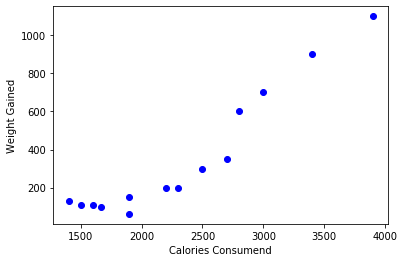

In [26]:
#STEP 03 : Apply Scatter plot to check for Extreme Values
plt.plot(df.Cc, df.Wg, 'bo'); plt.xlabel('Calories Consumend'); plt.ylabel('Weight Gained') # As there is no extreme values; no modification required for data

In [16]:
#STEP 04 : Check for Co-relation between Weight Gained & Calories Consumed
df.Wg.corr(df.Cc) # There is positive high Co-Relation between Weight Gained & Calories Consumed

0.9469910088554458

In [20]:
#STEP 05 : Create a linear Regression Model
Wg_Model = smf.ols('Wg~Cc', data=df).fit()
Wg_Model.params

Intercept   -625.752356
Cc             0.420157
dtype: float64

In [21]:
# STEP 06 : Check Model Summary
Wg_Model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Wg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           2.86e-07
Time:                        22:24:39   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Cc             0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Step 07 : Predict values of Weight Gained by using 'Wg_Model'
pred = Wg_Model.predict(df.iloc[:,1])

Text(0, 0.5, 'Weight Gained')

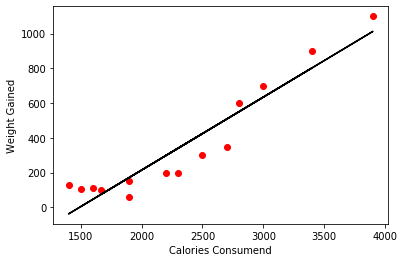

In [27]:
#Step 08 : Plot Linear regression Curve
plt.scatter(df.Cc, df.Wg, color='red');plt.plot(df.Cc, pred, color='black'); plt.xlabel('Calories Consumend'); plt.ylabel('Weight Gained')